<a href="https://colab.research.google.com/github/VarshaChanumolu/Prediction-of-Online-News-Popularity---Classification-Regression/blob/main/Prediction%20of%20Online%20News%20Popularity%20-%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [ ]:
Onews = pd.read_csv('OnlineNewsPopularity.csv')
Onews.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
Onews.columns = Onews.columns.str.replace(' ', '')

In [ ]:
Onews = Onews.drop(['url'], axis = 1)

In [ ]:
Onews = Onews[Onews['n_tokens_content'] != 0]
Onews.shape

(38463, 60)

In [ ]:
Onews = Onews[Onews['kw_min_min'] != -1]
Onews.shape

(16549, 60)

In [ ]:
OnewsN = Onews.drop(['self_reference_min_shares','self_reference_max_shares', 'self_reference_avg_sharess'], axis = 1)
OnewsN.shape

(16549, 57)

In [ ]:
OnewsN = OnewsN.drop(['is_weekend'], axis = 1)
OnewsN.shape

(16549, 56)

In [ ]:
def outliers(df, columns = None):
    if not columns:
        columns = df.columns
    
    for c in columns:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        floor, ceil = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        
        df = df[(df[c] >= floor) & (df[c] <= ceil)]
    return df

In [ ]:
OnewsNew = outliers(OnewsN,['shares'])

In [ ]:
import seaborn as sns

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shares'>

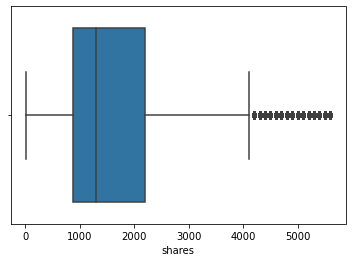

In [ ]:
sns.boxplot(OnewsNew['shares'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shares'>

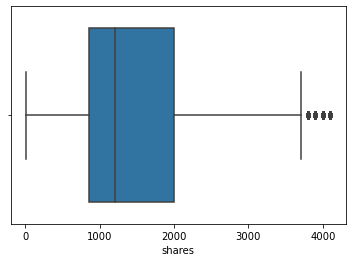

In [ ]:
OnewsNew1 = outliers(OnewsNew, ['shares'])
sns.boxplot(OnewsNew1['shares'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shares'>

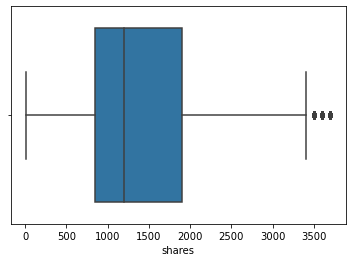

In [ ]:
OnewsNew2 = outliers(OnewsNew1, ['shares'])
sns.boxplot(OnewsNew2['shares'])

In [ ]:
col = ['n_tokens_content', 
      'n_unique_tokens',
      'kw_max_max', 'kw_max_min', 'kw_max_avg',
      'rate_positive_words', 'rate_negative_words',
      'avg_negative_polarity','avg_positive_polarity','title_subjectivity']

OnewsNew3 = OnewsNew2.drop(col, axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = OnewsNew3.drop(['shares'], axis = 1)
Y = OnewsNew3[['shares']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 100)

## Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,RepeatedKFold,GridSearchCV

In [ ]:
lasso = Lasso(normalize = True, alpha = 0.2)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2_score(y_test, y_pred)

0.08623086453821671

In [ ]:
lasso = Lasso(normalize = True)

cv = RepeatedKFold(n_splits = 100, n_repeats = 2)
grid = {}
grid['alpha'] = np.arange(0, 0.05, 0.01)

search = GridSearchCV(lasso, grid,scoring = "neg_mean_absolute_error", cv = cv, n_jobs = -1 )


res = search.fit(X, Y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3862896331.2755613, tolerance: 860501.3224760293
  model = cd_fast.enet_coordinate_descent(


In [ ]:
search.best_estimator_

Lasso(alpha=0.0, normalize=True)

In [ ]:
#lassoBest = Lasso(normalize = True, alpha = 0)
lassoBest = search.best_estimator_
lassoBest.fit(X_train, y_train)
y_pred = lassoBest.predict(X_test)
r2_score(y_test, y_pred)

<ipython-input-80-80ef8411c8b5>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoBest.fit(X_train, y_train)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2738198228.1593704, tolerance: 611439.0170510174
  model = cd_fast.enet_coordinate_descent(


0.09124551825567384

In [ ]:
lassoBest.coef_

array([ 7.55434798e-01, -2.24973350e+00, -7.17543961e+09, -5.34089085e+02,
        1.22886249e+00, -2.20409263e+00, -1.77148026e+00,  2.41935940e+00,
       -3.53170960e+01,  3.69275957e-01, -1.43783926e+01, -1.09277525e+02,
       -1.48120706e+02,  2.63828718e+02,  1.06548721e+02, -1.27657273e+01,
        5.01986003e-01, -9.48438400e-02, -2.29103216e-04, -2.22257411e-05,
        6.33042185e-03,  1.19519990e-01, -9.05292408e+01, -1.39722326e+02,
       -1.20735451e+02, -1.20780893e+02, -1.44004947e+00,  2.75491121e+02,
        2.15293063e+02,  3.14848536e+02, -7.96661123e+01, -1.34659711e+02,
       -1.60111345e+02,  1.29402437e+02,  2.85078677e+02, -1.39405003e+02,
        2.40162747e+02, -3.24098300e+02, -4.91130026e+02, -2.01978809e+01,
       -3.88067928e+00, -6.03970841e+01,  9.61934805e+01,  2.61944713e+02,
        8.00424324e+01])

In [ ]:
OnewsNew2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13554 entries, 0 to 24284
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      13554 non-null  float64
 1   n_tokens_title                 13554 non-null  float64
 2   n_tokens_content               13554 non-null  float64
 3   n_unique_tokens                13554 non-null  float64
 4   n_non_stop_words               13554 non-null  float64
 5   n_non_stop_unique_tokens       13554 non-null  float64
 6   num_hrefs                      13554 non-null  float64
 7   num_self_hrefs                 13554 non-null  float64
 8   num_imgs                       13554 non-null  float64
 9   num_videos                     13554 non-null  float64
 10  average_token_length           13554 non-null  float64
 11  num_keywords                   13554 non-null  float64
 12  data_channel_is_lifestyle      13554 non-null 

## Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lReg = LinearRegression(normalize = True)
lReg.fit(X_train, y_train)
y_pred = lReg.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.09139197102919094

In [ ]:
lReg.score(X_train, y_train), lReg.score(X_test, y_test)

(0.10436443255622785, 0.09139197102919094)

In [ ]:
lReg.coef_

array([[ 7.55496721e-01, -2.27942301e+00, -7.11677010e+09,
        -5.34300609e+02,  1.21127059e+00, -2.21316391e+00,
        -1.75529308e+00,  2.44954883e+00, -3.52827841e+01,
         5.25168935e-01, -1.40920943e+01, -1.09193433e+02,
        -1.47752277e+02,  2.64367825e+02,  1.06476317e+02,
        -1.31249786e+01,  5.02111381e-01, -9.50064791e-02,
        -2.29957846e-04, -2.21579792e-05,  6.48615349e-03,
         1.19567796e-01, -9.73381180e+14, -9.73381180e+14,
        -9.73381180e+14, -9.73381180e+14, -9.73381180e+14,
        -9.73381180e+14, -9.73381180e+14, -7.81722405e+12,
        -7.81722405e+12, -7.81722405e+12, -7.81722405e+12,
        -7.81722405e+12,  2.85439324e+02, -1.37843365e+02,
         2.36017759e+02, -3.09096294e+02, -4.91314997e+02,
        -2.15789646e+01, -3.12705735e+00, -5.97197693e+01,
         9.57847213e+01,  2.61304021e+02,  8.00246678e+01]])